In [3]:
import pandas as pd
import pickle
import torch
from torch import nn
import numpy as np

In [9]:
x_train = pd.read_csv('input_train__fppJZ22.csv')
x_train = x_train.drop(['md', 'bc', 'asset', 'day'], axis=1)
y_train = pd.read_csv('y_train_CGZ7jXu.csv')
x_test = pd.read_csv('input_test__2scdXsn.csv')
# y_rand = pd.read_csv('y_rand.csv')

1463
2100


<AxesSubplot:ylabel='Density'>

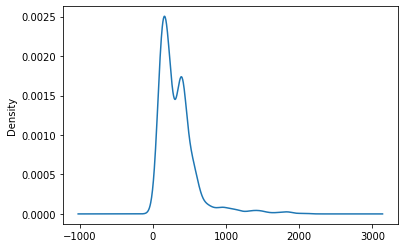

In [12]:
print(max(x_train['cluster']))
print(x_train.groupby('cluster').size().max())
x_train.groupby('cluster').size().plot.kde()

In [35]:
epochs = 10
inputSize = 25
hiddenSize = 50
numLayers = 1
lr = 1e-3
loss = torch.nn.MSELoss()
nn = torch.nn.RNN(inputSize, hiddenSize, numLayers)
optimizer = torch.optim.Adam(nn.parameters())
for day, cluster in enumerate(range(5)):
    X = 5
    Y = 5
    hidden = torch.zeros(hiddenSize)
    input = torch.cat((X, hidden), 1)
    for epoch in range(epochs):
        optimizer.zero_grad()
        output, _ = nn(input)
        loss_value = loss(output, Y)
        loss_value.backward()
        optimizer.step()
        if epoch % 5:
            print(f"Day: {day}, Cluster: {cluster}, Epoch: {epoch}, Loss: {loss_value.item()}")

Net(
  (nn): Sequential(
    (0): Linear(in_features=240, out_features=120, bias=True)
    (1): Linear(in_features=120, out_features=84, bias=True)
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)
